# What is Q-Learning?

Q-Learning is a values-based learning algorithm in reinforcement learning. It's used to find an optimal action-selection policy for a Markov Decision Process (MDP). It aims to learn the value of being in a given state, and taking a specific action there.

Here's a step-by-step description of the Q-Learning process:

1. **Initialize Q-values**: Q-values are initialized to an arbitrary value, and then updated iteratively to converge to the true Q-values.

2. **Observe the current state**: The agent observes the current state of the environment.

3. **Choose and perform an action**: The agent chooses an action based on the policy derived from the current Q-value (for example, the epsilon-greedy policy), and performs the action.

4. **Observe reward and new state**: The agent receives a reward and ends up in a new state as a result of the action.

5. **Update Q-value**: The Q-value for the state-action pair is updated using the observed reward and the maximum reward possible for the next state. This is done using the Q-Learning update rule:

    Q(state, action) = Q(state, action) + learning_rate * (reward + discount_factor * max(Q(next_state, all actions)) - Q(state, action))

6. **Repeat**: The process is repeated for many episodes until the Q-values converge.

The goal of Q-Learning is to learn a policy that tells the agent which action to take under what circumstances. It does not require a model of the environment and can handle problems with stochastic transitions and rewards, without requiring adaptations.

# Key Terminologies in Q-learning
Before we jump into how Q-learning works, we need to learn a few useful terminologies to understand Q-learning's fundamentals. 

* States(s): the current position of the agent in the environment. 
* Action(a): a step taken by the agent in a particular state. 
* Rewards: for every action, the agent receives a reward and penalty. 
* Episodes: the end of the stage, where agents can’t take new action. It happens when the agent has achieved the goal or failed. 
* Q(St+1, a): expected optimal Q-value of doing the action in a particular state. 
* Q(St, At): it is the current estimation of Q(St+1, a).
* Q-Table: the agent maintains the Q-table of sets of states and actions.
* Temporal Differences(TD): used to estimate the expected value of Q(St+1, a) by using the current state and action and previous state and action. 


# How Does Q-Learning Work?

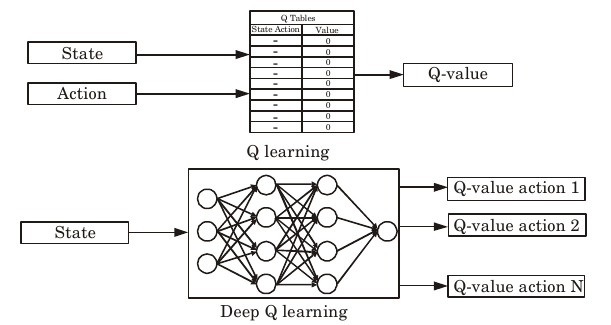

In [5]:
from IPython.display import Image
Image(filename="images/QL.png",width=900)

Q-Learning is a model-free reinforcement learning algorithm that seeks to find the best action to take given the current state. It's called Q-Learning because it learns a function Q that can predict the expected future reward for a given action in a given state.

Here's a step-by-step breakdown of how Q-Learning works:

1. **Initialize Q-Table**: Q-Learning starts by initializing the Q-table to small random values. The Q-table has one row for each possible state and one column for each possible action. The value of each cell represents the expected future reward for taking a particular action in a particular state.

2. **Choose an Action**: At each time step, the agent selects an action. This can be done using various strategies, but a common one is the epsilon-greedy strategy. With a probability of epsilon, the agent selects a random action (exploration), and the rest of the time it selects the action with the highest estimated future reward according to the Q-table (exploitation).

3. **Perform the Action and Get the Reward**: The agent performs the selected action, and the environment returns the new state and the reward for the action.

4. **Update the Q-Table**: The value of the Q-table for the selected state-action pair is updated based on the reward and the maximum expected future reward for the new state. The update is done using the formula:

    Q(state, action) = Q(state, action) + learning_rate * (reward + discount_factor * max(Q(new_state, all actions)) - Q(state, action))

   This formula is a simple way of saying: the new Q-value is a weighted average of the old value and the value of the best possible action at the next state.

5. **Repeat**: The process is repeated for many episodes until the Q-values converge. The agent gradually learns the optimal policy, which tells it the best action to take in each state to maximize its future rewards.

The beauty of Q-Learning is that it doesn't require a model of the environment, it can learn from its own experience. This makes it very powerful for solving complex problems where the dynamics of the environment are unknown or difficult to model.

# Python Code Implementation

Here's a simple implementation of Q-Learning in Python. This example assumes a simple environment with a finite number of states and actions.



In [1]:
import numpy as np

class QLearning:
    def __init__(self, states, actions, alpha=0.5, gamma=0.9, epsilon=0.1):
        self.states = states
        self.actions = actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = np.zeros((states, actions))

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice(self.actions)  # exploration
        else:
            action = np.argmax(self.Q[state, :])  # exploitation
        return action

    def learn(self, state, action, reward, next_state):
        predict = self.Q[state, action]
        target = reward + self.gamma * np.max(self.Q[next_state, :])
        self.Q[state, action] = self.Q[state, action] + self.alpha * (target - predict)



In this code:

- `states` and `actions` are the number of states and actions in the environment.
- `alpha` is the learning rate. It determines to what extent the newly acquired information will override the old information.
- `gamma` is the discount factor. It quantifies how much importance we give for future rewards.
- `epsilon` is the exploration rate. This is the probability that our agent will explore the environment rather than exploit it.
- `Q` is the Q-table initialized to zero. It stores the expected future reward for each action in each state.
- `choose_action` method implements the epsilon-greedy strategy.
- `learn` method implements the Q-Learning update rule.

This is a very basic implementation. In a real-world scenario, you would also need to implement the environment and the loop that puts the agent in interaction with the environment.

Here's a simple example of how you might use the QLearning class to train an agent on a hypothetical environment. This example uses a simple environment with 5 states and 2 actions. The reward is randomly generated.



In [2]:
import numpy as np

# Define the number of states and actions
n_states = 5
n_actions = 2

# Create the QLearning agent
agent = QLearning(states=n_states, actions=n_actions, alpha=0.5, gamma=0.9, epsilon=0.1)

# Train the agent
for episode in range(100):
    state = np.random.choice(n_states)  # Start with a random state
    while True:
        action = agent.choose_action(state)  # Agent chooses an action
        next_state = np.random.choice(n_states)  # Transition to new state (randomly chosen for this example)
        reward = np.random.choice([0, 1])  # Receive a reward (randomly chosen for this example)
        agent.learn(state, action, reward, next_state)  # Agent learns from the experience
        state = next_state  # Move on to the next state
        if np.random.uniform(0, 1) < 0.1:  # Random condition for the episode to end
            break

# Print the learned Q-values
print(agent.Q)

[[5.08989859 4.43426265]
 [4.1431201  4.62069528]
 [5.15490848 4.4955551 ]
 [4.81476233 4.55797524]
 [4.26826608 4.40539667]]




In this example, the agent is put through 100 episodes of interaction with the environment. In each episode, the agent starts in a random state, chooses an action, transitions to a new state, receives a reward, and learns from the experience. The episode ends when a random condition is met.

Please note that this is a very simplified example. In a real-world scenario, the states, actions, and rewards would be determined by the environment, not randomly generated. The condition for the episode to end would also be based on the environment (for example, when the agent reaches a goal state).

# **Thank You!**